In [2]:
import sdf_helper as sh
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib import colors
import sdf
plt.rcParams["font.size"]=13
plt.rcParams["figure.figsize"]=(10,8)

In [3]:
EXTENT = [-4, 4, -4, 4]
all_files = [f for f in os.listdir(".") if f.endswith(".sdf")]

In [4]:
def plot_sin(t, omega):
    tau = 2*np.pi/omega
    T = 10*tau
    if t<T:
        return np.sin(np.pi*t/T)
    else:
        return 0

plot_sin_vectorized = np.vectorize(plot_sin)

In [25]:
from numpy import pi, sin

Fs = 1000
T = 1/Fs
L = 50
t = np.arange(0,L-1)*T
# omega = 2*np.pi*100
S = 0.7*sin(2*pi*50*t) + sin(2*pi*120*t)

In [19]:
S[0:5]

array([0.        , 0.900859  , 1.40947641, 1.33682514, 0.79107279])

In [22]:
t[0:5]

array([0.   , 0.001, 0.002, 0.003, 0.004])

In [17]:
Fs = 5670/167
T = 1/Fs
L = 167
t = np.arange(0,L-1)*T
t.max()

4.85978835978836

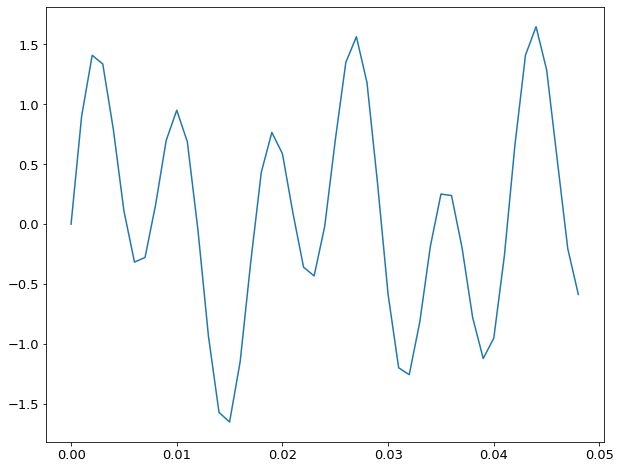

In [16]:
plt.plot(t, S)

In [26]:
Y = np.fft.fft(S)
# Y = np.fft.fftshift(Y)
Y = np.abs(Y/L)

In [27]:
f = Fs*np.arange(0,L//2+1)/L

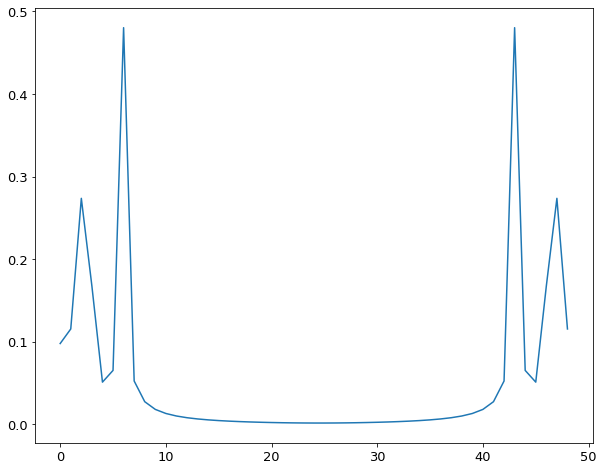

In [28]:
plt.plot(Y)

(0.0, 200.0)

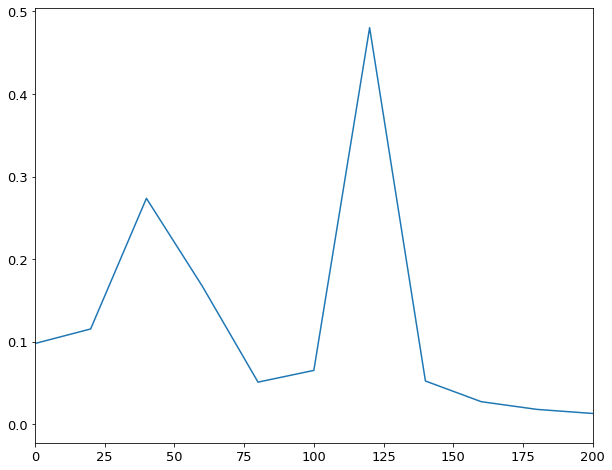

In [29]:
plt.plot(f, Y[:L//2+1])
plt.xlim(0, 200)

In [ ]:
len(S)

1499

In [ ]:
def get_field(id, component="y"):
    raw_data = sdf.read(all_files[id])
    comp = {
        "x": raw_data.Electric_Field_Ex,
        "y": raw_data.Electric_Field_Ey,
        "z": raw_data.Electric_Field_Ez,
    }
    field = comp[component].data
    return field

In [ ]:
Et1 = []
Et2 = []
d = []
all_field = []
for i in range(len(all_files)):
    data = get_field(i)
    all_field.append(data)
    Et1.append(data[100])
    Et2.append(data[400])
    data = sdf.read(all_files[i])
    d.append(data.Derived_Number_Density_Electron.data)

In [ ]:
omega_0 = 2*np.pi*299792458/1e-6

In [ ]:
t = np.arange(len(all_files))
L = len(all_files)
f = omega_0*np.arange(0,L//2+1)/(L*1e15)

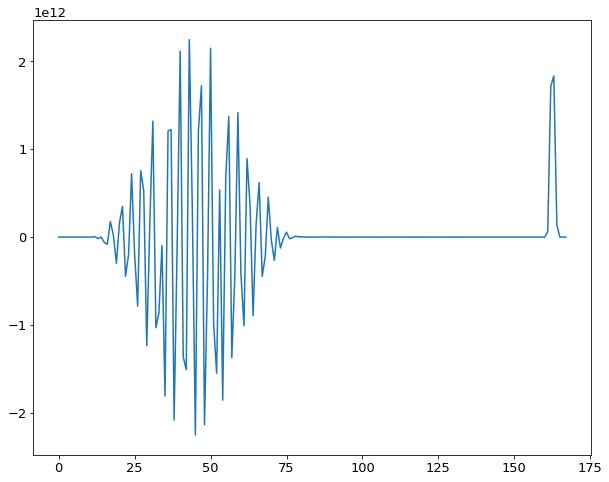

In [ ]:
plt.plot(Et2)

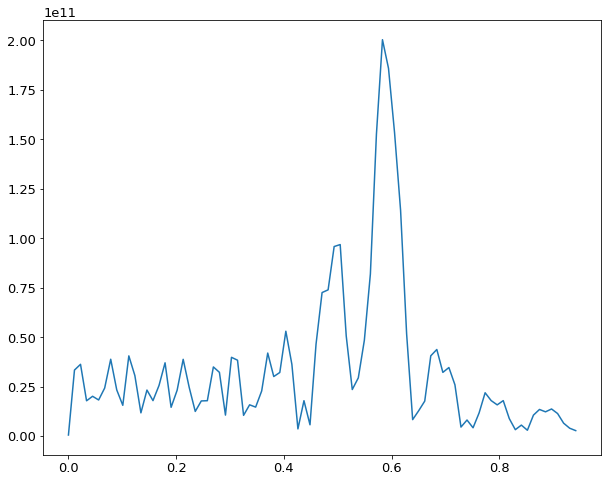

In [ ]:
Y = np.fft.fft(Et2)
Y = np.abs(Y/L)
plt.plot(f, Y[:L//2+1])

In [ ]:
data = get